<a href="https://colab.research.google.com/github/adrianglez77/Practica2-FSI/blob/master/Practica2model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


'LEGO brick images'   Sign-Language


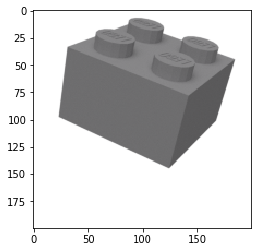

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/datasets"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasetcompleto/LEGO brick images/train/3003 Brick 2x2/0050.png', 'r')
imshow(np.asarray(pil_im))


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------
#tamaño del lote-> conjunto de muestras que metia dentro del modelo para que se lleve a cabo el aprendizaje
batch_size = 32

train_data_dir = '/content/drive/My Drive/Colab Notebooks/datasetcompleto/LEGO brick images/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/datasetcompleto/LEGO brick images/valid'

#ImageDataGenerator -> nos genera mas imagenes artificialmente -> 
#le damos la vuelta, zoom, la movemos,etc.
train_datagen = ImageDataGenerator(rescale=1./255)

#otro ImageDataGenerator para los elementos de datos
test_datagen = ImageDataGenerator(rescale=1./255)

#el directorio donde estan las imagenes, tamaño final, modo de clase categorica(binario (1 neurona d esalida), categorico(2 o mas))
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# MODEL --------------------------------------------------

#modelo secuencial, una capa detras de otra y el keras las engancha-> desde input hasta output
model = Sequential()
#le añadimos una capa convolutiva(32 num kernel, size tamaño del kernel, relu -> rectificador funcion de activacion distinta a sigmoide,
#input_shape los datos que van a entrar de 150x150 y el 3 de los colores RGB
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
#Maxpooling->tecnica que dividia todo en trozos de 2x2 que te quedabas con el mayor
model.add(MaxPooling2D(pool_size=(2, 2)))
#Conv2D-> el volumen del tensor lo metemos en otra capa convolutiva de 64
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Dropout-> desactivacion de ciertas neuronas(las congelamos para que no se actualicen sus pesos), para evitar overfeeting
#porque obligamos a otras neuronas a trabajar mas, a cubrir mas zonas
model.add(Dropout(0.25))
#Flatten->aplanador->coge el tensor y lo convierte en un vector
model.add(Flatten())
#metamos en capa densa(fully connected)-> 128 neuronas en la capa oculta
model.add(Dense(128, activation='relu'))
#congelamos la mitad
model.add(Dropout(0.5))
#softmax porque lo que nos interesa es una distribucion de probabilidades para la salida
model.add(Dense(16, activation='softmax'))

#loss es la perdida,optimizador-> descenso adaptativo, metricas-> accuracy-> comparamos los resultados con la validacion
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

#epochs-> entrenamiento de 20 epocas-> cuando usas todos los lotes es 1 epoca
epochs = 20

#fit_generator-> generador de imagenes
#pasos por epoca-> 6379/32
#validation_steps-> 1834/32
model.fit_generator(
        train_generator,
        steps_per_epoch=200,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=57,
)

Found 6379 images belonging to 16 classes.
Found 1834 images belonging to 16 classes.
Epoch 1/20
200/200 [==============================] - 2462s 12s/step - loss: 1.2321 - acc: 0.5930 - val_loss: 0.4731 - val_acc: 0.8257
Epoch 2/20
200/200 [==============================] - 42s 209ms/step - loss: 0.5857 - acc: 0.7902 - val_loss: 0.2702 - val_acc: 0.8957
Epoch 3/20
200/200 [==============================] - 41s 205ms/step - loss: 0.4134 - acc: 0.8474 - val_loss: 0.1899 - val_acc: 0.9173
Epoch 4/20
200/200 [==============================] - 41s 207ms/step - loss: 0.3240 - acc: 0.8777 - val_loss: 0.1625 - val_acc: 0.9306
Epoch 5/20
200/200 [==============================] - 41s 207ms/step - loss: 0.2705 - acc: 0.8930 - val_loss: 0.1178 - val_acc: 0.9489
Epoch 6/20
200/200 [==============================] - 41s 203ms/step - loss: 0.2301 - acc: 0.9064 - val_loss: 0.0949 - val_acc: 0.9567
Epoch 7/20
200/200 [==============================] - 44s 218ms/step - loss: 0.1945 - acc: 0.9187 - val_

In [0]:
model.summary();

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               10616960  
__________